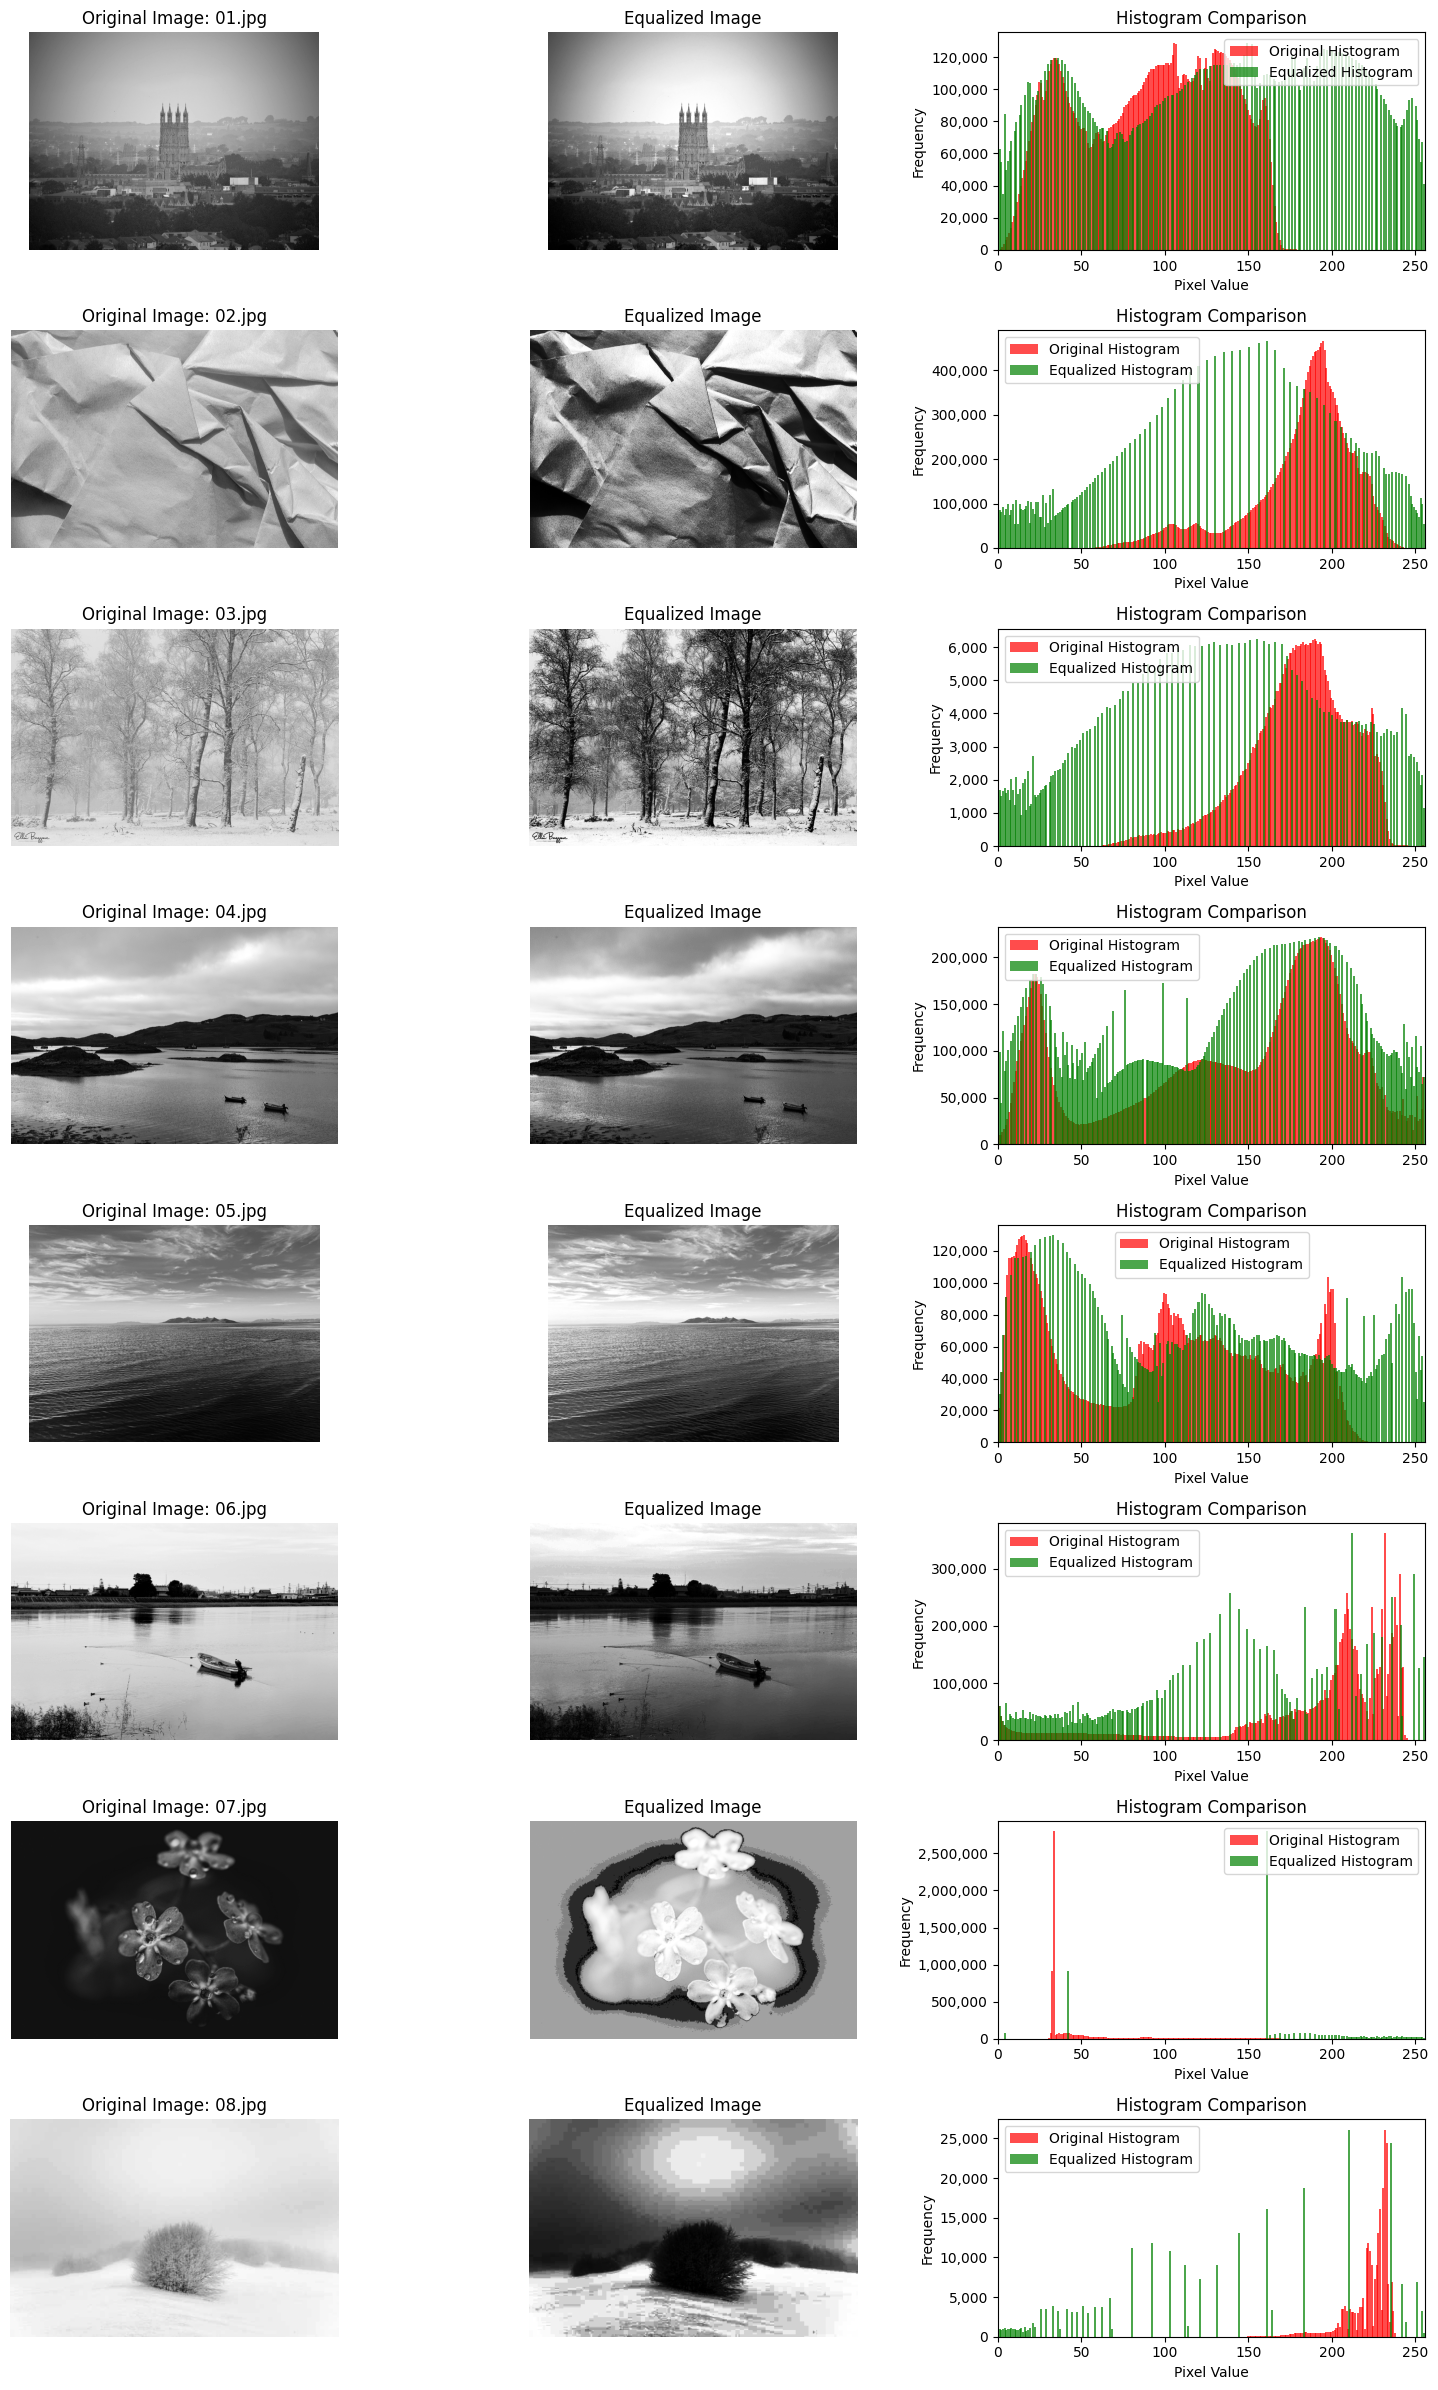

In [1]:
import cv2, numpy as np, matplotlib.pyplot as plt, os
from matplotlib.ticker import FuncFormatter

# 이미지 파일들이 저장된 폴더 경로
folder_path = 'img_histogram'

# 폴더 내 이미지 파일 목록 읽기
image_files = [f for f in os.listdir(folder_path) if f.lower().endswith(('jpg', 'jpeg', 'png', 'bmp'))]

# 처리할 이미지 수 제한 (최대 8개)
image_files = image_files[:8]

# subplot의 행(row)과 열(col) 설정
rows = len(image_files)  # 이미지 개수만큼 행 생성
cols = 3  # 원본 이미지, 평활화된 이미지, 히스토그램 비교

# 시각화 초기화
plt.figure(figsize=(5*cols, rows * 3))
chart_idx = 0  # 서브플롯 인덱스 초기화

# 각 이미지 처리
for idx, image_file in enumerate(image_files):
    image_path = os.path.join(folder_path, image_file)
    
    # 이미지 읽기 (그레이스케일로)
    image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

    # 히스토그램 평활화 적용
    equalized_image = cv2.equalizeHist(image)

    # 히스토그램 계산
    original_hist = cv2.calcHist([image], [0], None, [256], [0, 256]).ravel()
    equalized_hist = cv2.calcHist([equalized_image], [0], None, [256], [0, 256]).ravel()

    # 원본 이미지
    plt.subplot(rows, cols, chart_idx := chart_idx + 1)
    plt.title(f"Original Image: {image_file}")
    plt.axis('off')  # 축 제거
    plt.imshow(image, cmap='gray')

    # 평활화된 이미지
    plt.subplot(rows, cols, chart_idx := chart_idx + 1)
    plt.title("Equalized Image")
    plt.axis('off')  # 축 제거
    plt.imshow(equalized_image, cmap='gray')

    # 히스토그램 비교 (막대 위치 분리, 투명도 조정)
    plt.subplot(rows, cols, chart_idx := chart_idx + 1)
    plt.title("Histogram Comparison")
    plt.xlabel("Pixel Value")
    plt.ylabel("Frequency")
    x = np.arange(256)  # 픽셀 값 (0~255)
    plt.bar(x - 0.2, original_hist, width=1.2, color='red', alpha=0.7, label='Original Histogram')
    plt.bar(x + 0.2, equalized_hist, width=1.2, color='green', alpha=0.7, label='Equalized Histogram')
    plt.legend()
    plt.xlim([0, 256])

    # y축 tick 형식 변경
    plt.gca().yaxis.set_major_formatter(FuncFormatter(lambda value, _: f'{int(value):,}'))
pass

# 레이아웃 정리 및 출력
plt.tight_layout()
plt.show()